# Exploratory Data Analysis

## Visual exploratory data analysis

### pandas line plots

In the previous chapter, you saw that the .plot() method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from Yahoo Finance. Your job is to plot the 'Month' column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

All necessary modules have been imported for you, and the DataFrame is available in the workspace as df. Explore it using methods such as .head(), .info(), and .describe() to see the column names.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.DataFrame([['Jan', 117.160004, 534.5224450000002, 153.309998],
       ['Feb', 128.46000700000002, 558.402511, 161.940002],
       ['Mar', 124.43, 548.002468, 160.5],
       ['Apr', 125.150002, 537.340027, 171.28999299999995],
       ['May', 130.279999, 532.1099849999998, 169.649994],
       ['Jun', 125.43, 520.51001, 162.660004],
       ['Jul', 121.300003, 625.6099849999998, 161.990005],
       ['Aug', 112.760002, 618.25, 147.889999],
       ['Sep', 110.300003, 608.419983, 144.970001],
       ['Oct', 119.5, 710.8099980000002, 140.080002],
       ['Nov', 118.300003, 742.599976, 139.419998],
       ['Dec', 105.260002, 758.880005, 137.619995]], 
                 columns = ['Month', 'AAPL', 'GOOG', 'IBM'])
df

,Month,AAPL,GOOG,IBM
0,Jan,117.160004,534.522445,153.309998
1,Feb,128.460007,558.402511,161.940002
2,Mar,124.430000,548.002468,160.500000
3,Apr,125.150002,537.340027,171.289993
4,May,130.279999,532.109985,169.649994
5,Jun,125.430000,520.510010,162.660004
6,Jul,121.300003,625.609985,161.990005
7,Aug,112.760002,618.250000,147.889999
8,Sep,110.300003,608.419983,144.970001
9,Oct,119.500000,710.809998,140.080002


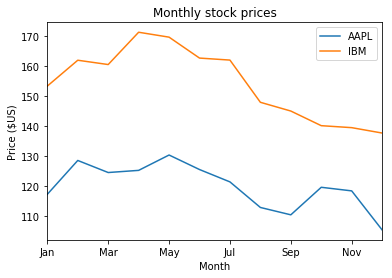

In [10]:
# Create a list of y-axis column names: y_columns
y_columns = ['AAPL', 'IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()


### pandas scatter plots
andas scatter plots are generated using the kind='scatter' keyword argument. Scatter plots require that the x and y columns be chosen by specifying the x and y parameters inside .plot(). Scatter plots also take an s keyword argument to provide the radius of each circle to plot in pixels.

In this exercise, you're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the UCI Machine Learning Repository.

The size of each circle is provided as a NumPy array called sizes. This array contains the normalized 'weight' of each automobile in the dataset.

All necessary modules have been imported and the DataFrame is available in the workspace as df.

In [11]:
df = pd.read_csv('autompg.csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [15]:
import numpy as np
sizes = pd.read_csv('size.csv', header=None)
sizes = np.array(sizes)

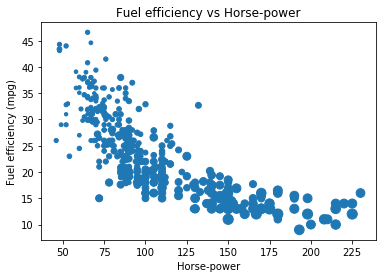

In [16]:
# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

### pandas box plots

While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The .plot() method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this exercise your job is to generate box plots for fuel efficiency (mpg) and weight from the automobiles data set. To do this in a single figure, you'll specify subplots=True inside .plot() to generate two separate plots.

All necessary modules have been imported and the automobiles dataset is available in the workspace as df.

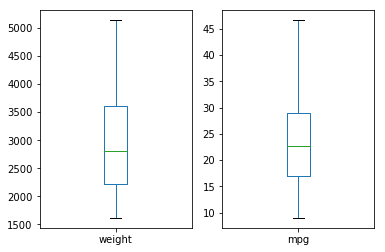

In [17]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

### pandas hist, pdf and cdf

Pandas relies on the .hist() method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the Seaborn package.

Your job is to plot a PDF and CDF for the fraction column of the tips dataset. This column contains information about what fraction of the total bill comprised of the tip.

Remember, when plotting the PDF, you need to specify normed=True in your call to .hist(), and when plotting the CDF, you need to specify cumulative=True in addition to normed=True.

All necessary modules have been imported and the tips dataset is available in the workspace as df. Also, some formatting code has been written so that the plots you generate will appear on separate rows.

In [19]:
df = pd.read_csv('tips.csv')
df['fraction'] = df.tip / df.total_bill
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


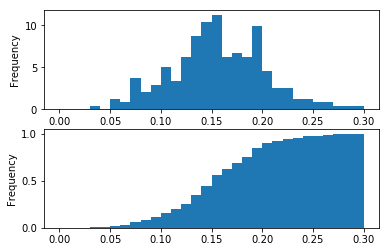

In [22]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', bins=30, normed=True, range=(0,.3))

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist',bins=30, normed=True, cumulative=True, range=(0,.3))

plt.show()


## Statistical exploratory data analysis


In [24]:
df = pd.read_csv('autompg.csv')
df.describe()

,mpg,cyl,displ,hp,weight,accel,yr
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Bachelor's degrees awarded to women
In this exercise, you will investigate statistics of the percentage of Bachelor's degrees awarded to women from 1970 to 2011. Data is recorded every year for 17 different fields. This data set was obtained from the Digest of Education Statistics.

Your job is to compute the minimum and maximum values of the 'Engineering' column and generate a line plot of the mean value of all 17 academic fields per year. To perform this step, you'll use the .mean() method with the keyword argument axis='columns'. This computes the mean across all columns per row.

The DataFrame has been pre-loaded for you as df with the index set to 'Year'.

In [29]:
df = pd.read_csv('edu.csv', index_col=0)
df.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


0.8
19.0


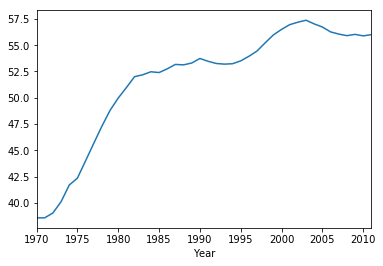

In [30]:
# Print the minimum value of the Engineering column
print(df.Engineering.min())

# Print the maximum value of the Engineering column
print(df.Engineering.max())

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

### Median vs mean
In many data sets, there can be large differences in the mean and median value due to the presence of outliers.

In this exercise, you'll investigate the mean, median, and max fare prices paid by passengers on the Titanic and generate a box plot of the fare prices. This data set was obtained from Vanderbilt University.

In [31]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


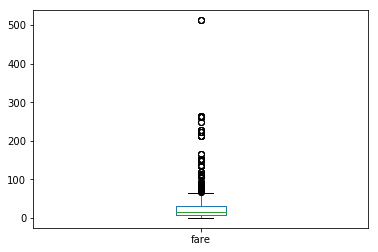

In [32]:
# Print summary statistics of the fare column with .describe()
print(df.fare.describe())

# Generate a box plot of the fare column
df.fare.plot(kind='box')

# Show the plot
plt.show()

### Quantiles
In this exercise, you'll investigate the probabilities of life expectancy in countries around the world. This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from Gapminder.

First, you will determine the number of countries reported in 2015. There are a total of 206 unique countries in the entire dataset. Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.



In [33]:
df = pd.read_csv('life_expectancy.csv')
df.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


208
       1800   1801   1802  1803  1804   1805   1806   1807  1808  1809  \
0.05  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3  25.3   
0.95  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 217 columns]


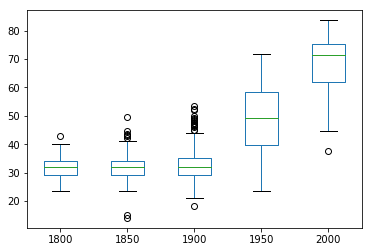

In [34]:
# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

### Standard deviation of temperature
Let's use the mean and standard deviation to explore differences in temperature distributions in Pittsburgh in 2013. The data has been obtained from Weather Underground.

In this exercise, you're going to compare the distribution of daily temperatures in January and March. You'll compute the mean and standard deviation for these two months. You will notice that while the mean values are similar, the standard deviations are quite different, meaning that one month had a larger fluctuation in temperature than the other.

The DataFrames have been pre-loaded for you as january, which contains the January data, and march, which contains the March data.

In [35]:
january = pd.DataFrame([['2013-01-01', 28],
       ['2013-01-02', 21],
       ['2013-01-03', 24],
       ['2013-01-04', 28],
       ['2013-01-05', 30],
       ['2013-01-06', 34],
       ['2013-01-07', 29],
       ['2013-01-08', 31],
       ['2013-01-09', 36],
       ['2013-01-10', 34],
       ['2013-01-11', 47],
       ['2013-01-12', 55],
       ['2013-01-13', 62],
       ['2013-01-14', 44],
       ['2013-01-15', 30],
       ['2013-01-16', 32],
       ['2013-01-17', 32],
       ['2013-01-18', 24],
       ['2013-01-19', 42],
       ['2013-01-20', 35],
       ['2013-01-21', 18],
       ['2013-01-22', 9],
       ['2013-01-23', 11],
       ['2013-01-24', 16],
       ['2013-01-25', 16],
       ['2013-01-26', 23],
       ['2013-01-27', 23],
       ['2013-01-28', 40],
       ['2013-01-29', 59],
       ['2013-01-30', 58],
       ['2013-01-31', 32]], 
                      columns = ['Date', 'Temperature'])

march = pd.DataFrame([['2013-03-01', 28],
       ['2013-03-02', 26],
       ['2013-03-03', 24],
       ['2013-03-04', 28],
       ['2013-03-05', 32],
       ['2013-03-06', 34],
       ['2013-03-07', 36],
       ['2013-03-08', 32],
       ['2013-03-09', 40],
       ['2013-03-10', 55],
       ['2013-03-11', 55],
       ['2013-03-12', 40],
       ['2013-03-13', 32],
       ['2013-03-14', 30],
       ['2013-03-15', 38],
       ['2013-03-16', 36],
       ['2013-03-17', 32],
       ['2013-03-18', 34],
       ['2013-03-19', 36],
       ['2013-03-20', 32],
       ['2013-03-21', 22],
       ['2013-03-22', 28],
       ['2013-03-23', 34],
       ['2013-03-24', 34],
       ['2013-03-25', 32],
       ['2013-03-26', 34],
       ['2013-03-27', 34],
       ['2013-03-28', 37],
       ['2013-03-29', 43],
       ['2013-03-30', 43],
       ['2013-03-31', 44]],
                    columns = ['Date', 'Temperature'])


In [37]:
# Print the mean of the January and March data
print(january.mean())
print(march.mean())

# Print the standard deviation of the January and March data
print(january.std())
print(march.std())

Temperature    32.354839
dtype: float64
Temperature    35.0
dtype: float64
Temperature    13.583196
dtype: float64
Temperature    7.478859
dtype: float64


## Separating populations with Boolean indexing

### Filtering and counting

How many automobiles were manufactured in Asia in the automobile dataset? The DataFrame has been provided for you as df. Use filtering and the .count() member method to determine the number of rows where the 'origin' column has the value 'Asia'.



In [40]:
df = pd.read_csv('autompg.csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [41]:
df[df.origin == 'Asia'].count()

mpg       79
cyl       79
displ     79
hp        79
weight    79
accel     79
yr        79
origin    79
name      79
dtype: int64

### Separate and summarize

Let's use population filtering to determine how the automobiles in the US differ from the global average and standard deviation. How the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In this exercise, you'll compute the means and standard deviations of all columns in the full automobile dataset. Next, you'll compute the same quantities for just the US population and subtract the global values from the US values.

In [42]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df.mean()
global_std = df.std()

# Filter the US population from the origin column: us
us = df[df.origin == 'US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


### Separate and plot

Population filtering can be used alongside plotting to quickly determine differences in distributions between the sub-populations. You'll work with the Titanic dataset.

There were three passenger classes on the Titanic, and passengers in each class paid a different fare price. In this exercise, you'll investigate the differences in these fare prices.

Your job is to use Boolean filtering and generate box plots of the fare prices for each of the three passenger classes. The fare prices are contained in the 'fare' column and passenger class information is contained in the 'pclass' column.

When you're done, notice the portions of the box plots that differ and those that are similar.

The DataFrame has been pre-loaded for you as titanic

In [43]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


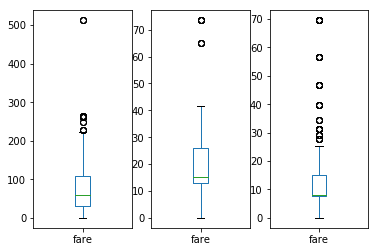

In [45]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=1, ncols=3)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

# Display the plot
plt.show()
